In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import seaborn as sns
import sklearn.datasets as datasets
%matplotlib inline

In [2]:
import matplotlib
%matplotlib inline
from google.colab import files
uploaded = files.upload()

Saving iris.data to iris.data


In [3]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name = fn,length = len(uploaded[fn])))

User uploaded file "iris.data" with length 4609 bytes


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('iris.data')
df.head()

sepallength  sepalwidth  petallength  petalwidth classlabel\t
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa

In [8]:

# to display stats about data
df.describe()

sepallength  sepalwidth  petallength  petalwidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.054000     3.758667    1.198667
std       0.828066    0.433594     1.764420    0.763161
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.350000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000

In [9]:

# to basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   classlabel	  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
# to display no. of samples on each class
df['classlabel\t'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: classlabel\t, dtype: int64

In [12]:
# check for null values
df.isnull().sum()

sepallength     0
sepalwidth      0
petallength     0
petalwidth      0
classlabel\t    0
dtype: int64

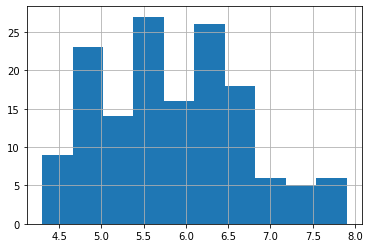

In [14]:
# histograms
df['sepallength'].hist()

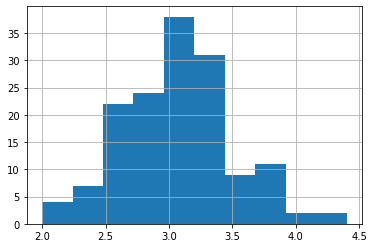

In [15]:

df['sepalwidth'].hist()

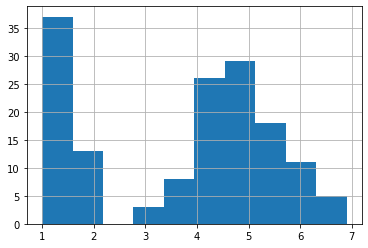

In [16]:
df['petallength'].hist()

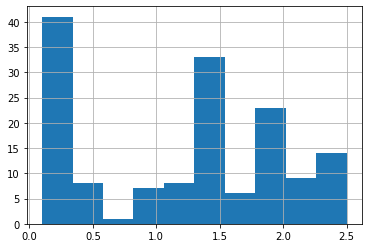

In [17]:

df['petalwidth'].hist()

In [23]:
# scatterplot
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

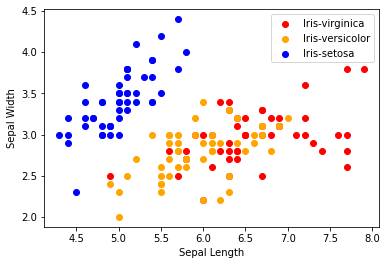

In [24]:
for i in range(3):
    x = df[df['classlabel\t'] == species[i]]
    plt.scatter(x['sepallength'], x['sepalwidth'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

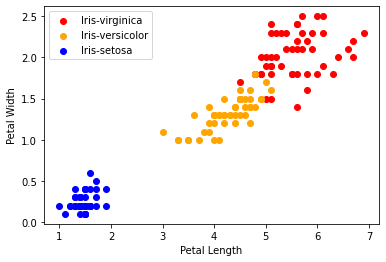

In [25]:
for i in range(3):
    x = df[df['classlabel\t'] == species[i]]
    plt.scatter(x['petallength'], x['petalwidth'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

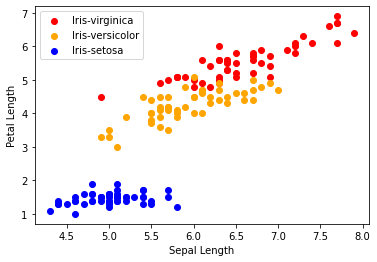

In [27]:
for i in range(3):
    x = df[df['classlabel\t'] == species[i]]
    plt.scatter(x['sepallength'], x['petallength'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

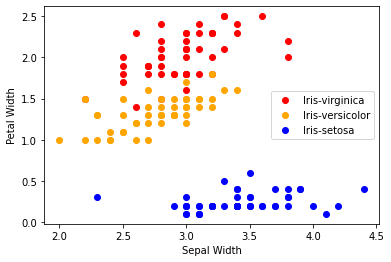

In [28]:
for i in range(3):
    x = df[df['classlabel\t'] == species[i]]
    plt.scatter(x['sepalwidth'], x['petalwidth'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

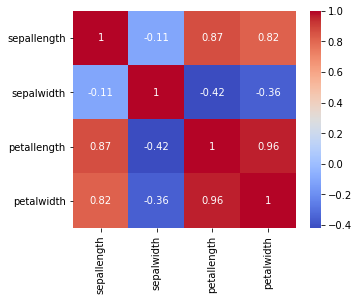

In [29]:
#Coorelation Matrix
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

In [30]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [32]:
df['classlabel\t'] = le.fit_transform(df['classlabel\t'])
df.head()

sepallength  sepalwidth  petallength  petalwidth  classlabel\t
0          5.1         3.5          1.4         0.2             0
1          4.9         3.0          1.4         0.2             0
2          4.7         3.2          1.3         0.2             0
3          4.6         3.1          1.5         0.2             0
4          5.0         3.6          1.4         0.2             0

In [33]:
#Model Training

In [34]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = df.drop(columns=['classlabel\t'])
Y = df['classlabel\t']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [35]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [36]:
# model training
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  91.11111111111111


In [38]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [39]:
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [40]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  91.11111111111111


In [41]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [42]:
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [43]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  93.33333333333333
